In [73]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 
import pandas as pd

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher
from pyswarms.utils.plotters.formatters import Designer
from pyswarms.utils.search.grid_search import GridSearch
from pyswarms.utils.search.random_search import RandomSearch

In [74]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.holdertable, iters=100)

2023-07-29 16:57:06,128 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-1.73
2023-07-29 16:57:06,218 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1.7329720854867876, best pos: [ 1.26262560e+00 -3.82108031e-04]


2023-07-29 18:11:26,485 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.5, 'k': 10, 'p': 1}
pyswarms.single.global_best:   3%|▎         |3/100, best_cost=-743
2023-07-29 18:11:26,500 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.5, 'k': 10, 'p': 1}
pyswarms.single.global_best:   0%|          |0/100, best_cost=-715

pyswarms.single.global_best:   5%|▌         |5/100, best_cost=-715
2023-07-29 18:11:26,523 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.5, 'k': 10, 'p': 1}
pyswarms.single.global_best:   3%|▎         |3/100, best_cost=-764
2023-07-29 18:11:26,540 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.5, 'k': 10, 'p': 1}
pyswarms.single.global_best:   3%|▎         |3/100, best_cost=-780
2023-07-29 18:11:26,570 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.5, 'k': 10, 'p': 1}
pyswarms.single.global_best:   4%|▍         |4/100, best_cost=-946
2023-07-29 18:11:26,593 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.5, 'k': 10, 'p': 1}
pyswarms.single.global_best:   4%|▍         |4/100, best_cost=-897
2023-07-29 18:11:26,615 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5

here


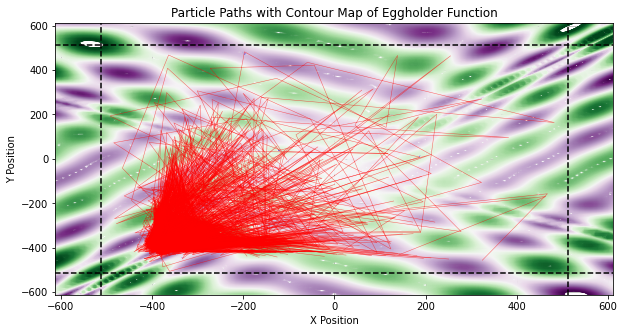

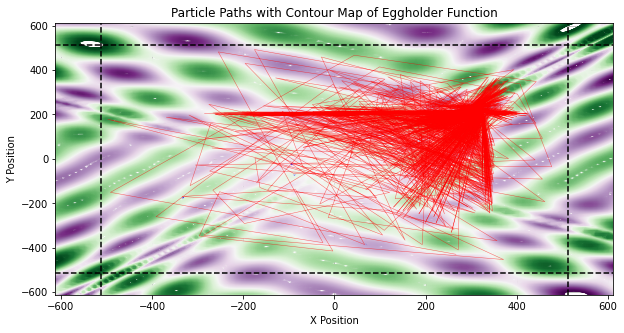

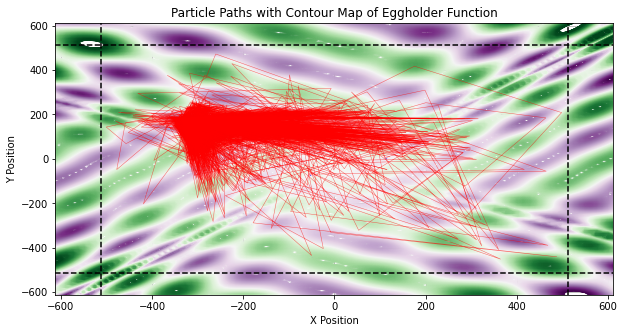

In [89]:
import matplotlib.pyplot as plt
import random
import time 
def plot_and_save_results_mesh(optimizer, savepath, limits=[(-512, 512), (-512, 512)]):
    # Extract initial and final positions for each particle
    mesher = Mesher(func=fx.eggholder,limits=limits)
    pos_history_3d = mesher.compute_history_3d(optimizer.pos_history)
    particle_data = pos_history_3d
    initial_positions = particle_data[0, :, :2]
    final_positions = particle_data[-1, :, :2]

    # Create a meshgrid for the contour plot
    holdertablefunction = lambda x,y: -np.abs(np.sin(x) * np.cos(y) * np.exp(np.abs(1 - np.sqrt(x**2 + y**2) / np.pi)))
    eggholderfunction = lambda x,y: -(y + 47) * np.sin(np.sqrt(np.abs(x/2 + (y + 47)))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    x_range = np.linspace(limits[0][0]  -100 , limits[0][1]  +100 , 100)
    y_range = np.linspace(limits[1][0]  -100 , limits[1][1]  +100 , 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = eggholderfunction(X, Y)
    

    # Plot initial and final positions of particles
    plt.figure(figsize=(10, 5))


    # Plot the contour map
    plt.contour(X,Y,Z,np.linspace(-1000, 1000, 2000),cmap='PRGn', alpha=0.3)
    # plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)

    # Plot paths of each particle
    for particle in particle_data[:, :, :2]:
        plt.plot(particle[:, 0], particle[:, 1], color='red', linewidth=0.5, alpha=0.6)

    plt.xlim([limits[0][0] - 100, limits[0][1] + 100])
    plt.ylim([limits[1][0] - 100, limits[1][1] + 100])
    plt.scatter(initial_positions[:, 0], initial_positions[:, 1], color='blue', label='Initial Position', s=10)
    plt.scatter(final_positions[:, 0], final_positions[:, 1], color='green', label='Final Position', s=1)
    plt.axvline(x=-512, color='black', linestyle='--')
    plt.axvline(x=512, color='black', linestyle='--', )
    plt.axhline(y=-512, color='black', linestyle='--')
    plt.axhline(y=512, color='black', linestyle='--')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Particle Paths with Contour Map of Eggholder Function')
    plt.legend()
    plt.grid(True)
    plt.savefig(savepath)
    return pos_history_3d
    

options_list=[
        {'c1': 0.5, 'c2': 0.5, 'w':0.5, 'k': 10, 'p': 1},
        {'c1': 0.0, 'c2': 0.5, 'w':0.5, 'k': 10, 'p': 1},
        {'c1': 1.0, 'c2': 0.5, 'w':0.5, 'k': 10, 'p': 1}, 
        {'c1': 0.5, 'c2': 0.0, 'w':0.5, 'k': 10, 'p': 1}, 
        {'c1': 0.5, 'c2': 1.0, 'w':0.5, 'k': 10, 'p': 1},
        {'c1': 0.5, 'c2': 0.5, 'w':0, 'k': 10, 'p': 1}, 
        #{'c1': 0.5, 'c2': 0.5, 'w':1.0, 'k': 10, 'p': 1},  #May cause particle divergence
        {'c1': 0.5, 'c2': 0.5, 'w':0.5, 'k': 1, 'p': 1}, 
        {'c1': 0.5, 'c2': 0.5, 'w':0.5, 'k': 5, 'p': 1},
        {'c1': 0.5, 'c2': 0.5, 'w':0.5, 'k': 10, 'p': 2},
        ]

best_pos, best_cost = [], []
pos_his = []
i = 0
while i < 3:
    options = options_list[0]
    random_list = np.array([(random.uniform(-500,500), random.uniform(-500, 500)) for _ in range(50)])
    optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, init_pos=random_list, options=options)
    try:
        cost, pos = optimizer.optimize(fx.eggholder, iters=100)
        pos_his = plot_and_save_results_mesh(optimizer=optimizer, savepath="comparison_test" + str(i) + ".png")
        best_cost.append(cost)
        best_pos.append(pos)
    except ValueError as e:
        i -= 1

    i += 1

In [83]:
#Print the minimum of best_cost and the position where it was found along with its index
print("Minimum of best_cost: ", np.min(best_cost))
print("Position of minimum: ", best_pos[np.argmin(best_cost)])
print("Index of minimum: ", np.argmin(best_cost))

Minimum of best_cost:  -561.9842055165304
Position of minimum:  [285.82732547 236.33711151]
Index of minimum:  1


(100, 50)
(100,)


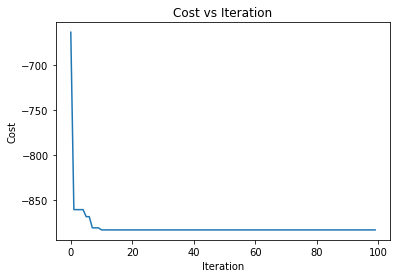

In [94]:
costs = pos_his[:,:, 2]

print(np.array(costs).shape)

#This is a 100 x 50 array. Convert to a 100 x 1 array where each element is the MINIMUM of the 50 iterations
costs_min = np.min(costs, axis=1)
print(np.array(costs_min).shape)

        
plt.plot(costs_min)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()


In [78]:
%%capture

from pyswarms.single import GlobalBestPSO, LocalBestPSO
# Grid search
options = {    'c1': [0, 1],
               'c2': [0, 1],
               'w' : [0, 3],
               'k' : [0, 10],
               'p' : 1 }
searcher = RandomSearch(optimizer=GlobalBestPSO, n_particles=10, n_selection_iters=100, dimensions=2,
                   options=options, objective_func=fx.holdertable, iters=100)

best_scores_list = []
best_options_list = []
for _ in range(100):
    try:
        best_score, best_options = searcher.search()
        best_scores_list.append(best_score)
        best_options_list.append(best_options)
    except:
        print("p")
        pass
print(len(best_scores_list))

In [79]:
import numpy as np 

best_options_list = [{k: v for k, v in dictionary.items() if k not in {'p'}} for dictionary in best_options_list]
df_fake = pd.DataFrame(best_options_list)
df_fake["best_scores_list"] = best_scores_list
df = df_fake[df_fake["best_scores_list"] < 0.001]
print(df.shape)
print(df.describe())
print(df.corr())

(0, 1)
       best_scores_list
count               0.0
mean                NaN
std                 NaN
min                 NaN
25%                 NaN
50%                 NaN
75%                 NaN
max                 NaN
                  best_scores_list
best_scores_list               NaN


KeyError: 'c1'

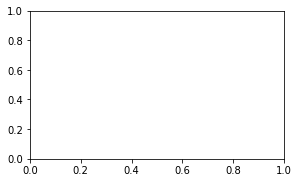

In [80]:
# Visualize Distributions as Scatter Plots
plt.figure(figsize=(10, 6))
df_filtered = df
plt.subplot(2, 2, 1)
plt.scatter(df_filtered["c1"], df_filtered["best_scores_list"])
plt.xlabel("c1, cognitive")
plt.ylabel("Optimal Cost")

plt.subplot(2, 2, 2)
plt.scatter(df_filtered["c2"], df_filtered["best_scores_list"])
plt.xlabel("c2, social")
plt.ylabel("Optimal Cost")

plt.subplot(2, 2, 3)
plt.scatter(df_filtered["w"], df_filtered["best_scores_list"])
plt.xlabel("w, intertial")
plt.ylabel("Optimal Cost")

plt.tight_layout()
plt.show()

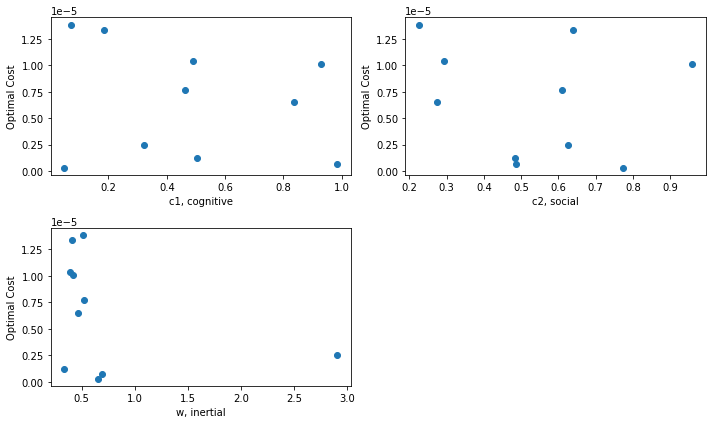

              c1         c2          w          k  best_scores_list
count  10.000000  10.000000  10.000000  10.000000      1.000000e+01
mean    0.482865   0.537398   0.731106   4.400000      6.659579e-06
std     0.341497   0.232556   0.773334   3.306559      5.233918e-06
min     0.048362   0.226013   0.336188   1.000000      2.936746e-07
25%     0.219358   0.341839   0.412242   1.000000      1.520973e-06
50%     0.474794   0.547583   0.490795   4.500000      7.107995e-06
75%     0.754026   0.635927   0.617259   6.750000      1.029423e-05
max     0.984061   0.958458   2.908798   9.000000      1.385162e-05


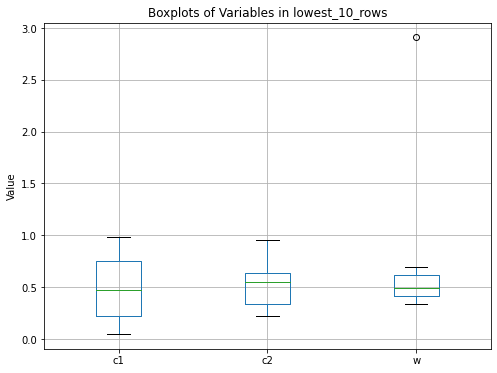

In [ ]:
lowest_10_rows = df_filtered.nsmallest(10, "best_scores_list")

plt.figure(figsize=(10, 6))
df_filtered = df
plt.subplot(2, 2, 1)
plt.scatter(lowest_10_rows["c1"], lowest_10_rows["best_scores_list"])
plt.xlabel("c1, cognitive")
plt.ylabel("Optimal Cost")

plt.subplot(2, 2, 2)
plt.scatter(lowest_10_rows["c2"], lowest_10_rows["best_scores_list"])
plt.xlabel("c2, social")
plt.ylabel("Optimal Cost")

plt.subplot(2, 2, 3)
plt.scatter(lowest_10_rows["w"], lowest_10_rows["best_scores_list"])
plt.xlabel("w, inertial")
plt.ylabel("Optimal Cost")

plt.tight_layout()
plt.show()

print(lowest_10_rows.describe())
lowest_10_rows_box = lowest_10_rows.drop(columns=["k", "best_scores_list"])
plt.figure(figsize=(8, 6))
lowest_10_rows_box.boxplot()
plt.title("Boxplots of Variables in lowest_10_rows")
plt.ylabel("Value")
plt.show()

In [ ]:
no_outs = lowest_10_rows[lowest_10_rows["w"] < 1]
print(no_outs.describe())

             c1        c2         w         k  best_scores_list
count  9.000000  9.000000  9.000000  9.000000      9.000000e+00
mean   0.500868  0.527554  0.489140  4.777778      7.123310e-06
std    0.357143  0.244443  0.118920  3.270236      5.329058e-06
min    0.048362  0.226013  0.336188  1.000000      2.936746e-07
25%    0.185530  0.294126  0.408604  1.000000      1.199296e-06
50%    0.488830  0.486671  0.469381  5.000000      7.689756e-06
75%    0.837277  0.639239  0.518899  7.000000      1.036241e-05
max    0.984061  0.958458  0.692946  9.000000      1.385162e-05


In [ ]:
%%capture
# 2D animation
designer = Designer(limits=[(-1,2), (-1,2)], label=['x-axis', 'y-axis'])
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=mesher,
                         mark=(1,1),
                         designer=designer)

In [ ]:
# Animations
animation.save('plot0.gif', writer='imagemagick', fps=10)
Image(url='plot0.gif')

2023-07-27 21:25:19,651 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-07-27 21:25:19,652 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


<class 'matplotlib.animation.FuncAnimation'>


KeyboardInterrupt: 

In [ ]:
# Animation
m = Mesher(func=fx.holdertable)
pos_history_3d = m.compute_history_3d(optimizer.pos_history)
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])
print(len(pos_history_3d[1]))

3


In [ ]:
%%capture
# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima
print(animation3d)

In [ ]:
animation3d.save('plot1.gif', writer='imagemagick', fps=10)
Image(url='plot1.gif')

2023-07-27 07:09:45,388 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-07-27 07:09:45,389 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


KeyboardInterrupt: 